 ```{contents}
```

# Random Forest Regressor

A **Random Forest Regressor (RFR)** is an **ensemble learning method** that combines multiple **Decision Trees** to perform regression (predict continuous values).

* Instead of relying on a single decision tree (which may overfit), RFR **aggregates predictions from multiple trees** to improve accuracy and generalization.
* It uses **bagging (bootstrap aggregation)** and **random feature selection** to create diversity among trees.

**Key Idea:**

> "Many weak trees working together produce a strong, stable prediction."

---

## **2. How It Works (Intuition)**

1. **Bootstrap Sampling:**

   * Randomly select samples from the training data **with replacement** to train each tree.
   * Each tree sees a slightly different dataset.

2. **Random Feature Selection:**

   * At each split in a tree, a **random subset of features** is considered.
   * This introduces more diversity among trees and reduces correlation.

3. **Tree Training:**

   * Each tree is grown independently and can be deep (can overfit its sample).

4. **Prediction Aggregation:**

   * **Regression:** The final prediction is the **average** of predictions from all trees.
   * This reduces variance and improves generalization.

---

## **3. Advantages of Random Forest Regressor**

| Advantage                      | Explanation                                                                |
| ------------------------------ | -------------------------------------------------------------------------- |
| **Reduces overfitting**        | Averaging multiple trees smooths out noise and variance from single trees. |
| **Handles nonlinearity**       | Trees naturally capture nonlinear relationships.                           |
| **Robust to outliers & noise** | Ensemble averaging reduces impact of extreme values.                       |
| **Minimal assumptions**        | No linearity or normality required.                                        |
| **Feature importance**         | Can rank features by their contribution to reducing error.                 |

---

## **4. Key Hyperparameters**

| Parameter           | Description                            | Effect                                                    |
| ------------------- | -------------------------------------- | --------------------------------------------------------- |
| `n_estimators`      | Number of trees                        | More trees → lower variance, slower computation           |
| `max_depth`         | Maximum depth of each tree             | Limits overfitting; deeper trees → more complex model     |
| `min_samples_split` | Min samples to split a node            | Higher → simpler tree → reduces overfitting               |
| `min_samples_leaf`  | Min samples in a leaf                  | Larger → smoother predictions → reduces overfitting       |
| `max_features`      | Max features to consider at each split | Lower → more randomness → reduces correlation among trees |
| `bootstrap`         | Whether to use bootstrap samples       | Usually True; False → full dataset per tree, can overfit  |

---

## **5. Cost Function**

* Each tree in a Random Forest Regressor uses a **splitting criterion** to decide the best splits:

  * **Variance Reduction (Squared Error):** Default criterion
  * **Absolute Error (L1):** More robust to outliers
* Trees are trained independently; the ensemble reduces overall error.

---

## **6. Example Use Cases**

* Predicting **house prices**
* Forecasting **sales, stock prices**
* Estimating **medical measurements** (e.g., blood pressure)
* Any regression problem with **nonlinear patterns** and **mixed feature types**

---

## **7. Strengths vs Weaknesses**

| Strength                       | Weakness                                       |
| ------------------------------ | ---------------------------------------------- |
| High accuracy & robust         | Harder to interpret than a single tree         |
| Handles nonlinear & mixed data | More memory and computation needed             |
| Reduces overfitting            | Predictions are less smooth if trees are small |
| Feature importance available   | Cannot extrapolate beyond observed values      |

---

### **8. Summary Intuition**

* Each tree → “opinion” about the target value.
* Random Forest → “wisdom of the crowd” → averages all opinions.
* Outperforms a single tree because it **reduces variance without increasing bias too much**.



Train -> R²: 0.96, RMSE: 0.14
Test -> R²: 0.78, RMSE: 0.31
OOB Score: 0.6969873218606408


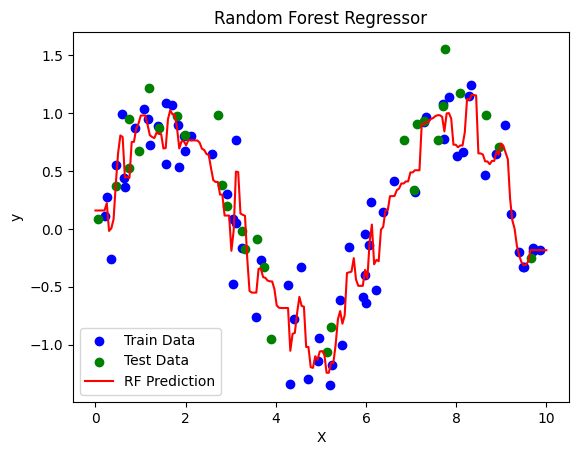

In [2]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Step 2: Create Sample Regression Dataset
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.3, X.shape[0])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100,      # number of trees
    max_depth=None,        # no max depth
    min_samples_split=2,   # minimum samples to split
    min_samples_leaf=1,    # minimum samples per leaf
    max_features=100,   # features considered at each split
    random_state=42,
    oob_score=True          # enable out-of-bag evaluation
)

# Step 4: Train the model
rf.fit(X_train, y_train)

# Step 5: Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Step 6: Evaluate Model
def evaluate(y_true, y_pred, label=""):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{label} -> R²: {r2:.2f}, RMSE: {rmse:.2f}")

evaluate(y_train, y_train_pred, "Train")
evaluate(y_test, y_test_pred, "Test")
print("OOB Score:", rf.oob_score_)

# Step 7: Visualization
X_plot = np.linspace(0, 10, 200).reshape(-1, 1)
y_plot = rf.predict(X_plot)

plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_plot, y_plot, color='red', label='RF Prediction')
plt.title("Random Forest Regressor")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Step 8: Feature Importance (if multiple features)
if X.shape[1] > 1:
    importances = rf.feature_importances_
    print("Feature Importances:", importances)


### **Interpretation**

1. **Dataset:** $y = \sin(X) + \text{noise}$ → nonlinear regression example.
2. **Random Forest Regressor:**

   * 100 trees (`n_estimators=100`)
   * Trains independently on **bootstrapped samples**
   * Uses **random subset of features** at each split (`max_features='auto'`)
   * `oob_score=True` gives an **unbiased performance estimate** using Out-of-Bag samples.
3. **Metrics:**

   * **Train R²** → how well model fits training data
   * **Test R²** → generalization performance
   * **RMSE** → error magnitude
4. **Visualization:**

   * Red curve → Random Forest predictions
   * Blue/Green points → training/test data
5. **Feature Importance:**

   * Shows which features contributed most to reducing variance (useful if multiple features exist)

---

### **Key Takeaways**

* Random Forest **averages predictions of many trees**, reducing variance.
* Handles **nonlinear relationships** naturally.
* Out-of-Bag evaluation provides **built-in validation**.
* Hyperparameters like `max_depth`, `min_samples_leaf`, and `n_estimators` are crucial to **avoid overfitting or underfitting**.

